In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import zipfile
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tabulate import tabulate
from sklearn.tree import plot_tree
from tensorflow.keras.models import Sequential
from sklearn.ensemble import StackingClassifier
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
import tensorflow

import joblib

In [184]:
path = r"C:\Users\ankit\OneDrive\archive (1).zip"
print(path)

C:\Users\ankit\OneDrive\archive (1).zip


In [185]:
zip_path = 'C:\\Users\\ankit\\OneDrive\\archive (1).zip'
extract_path = 'C:\\Users\\ankit\\OneDrive\\'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [186]:
df = pd.read_csv('C:\\Users\\ankit\\OneDrive\\mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [187]:
column_names = df.columns
column_names

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [189]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [190]:
##Check for null values
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [191]:
## Checking duplicate values
df.duplicated().sum()

0

In [192]:
##Print unique values of each attribute

def get_column_info(df):
    """
    Collect information about categorical columns in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.

    Returns:
    list: A list of lists where each sublist contains:
        - Column name (str)
        - Number of unique values (int)
        - Comma-separated string of unique values (str)
    """
    column_info = []
    for column in df.columns:
        if df[column].dtype == 'object' or pd.api.types.is_categorical_dtype(df[column]):
            unique_values = df[column].unique()
            num_unique_values = df[column].nunique()
            unique_values_str = ", ".join(map(str, unique_values))
            column_info.append([column, num_unique_values, unique_values_str])
    return column_info


In [193]:
column_info = get_column_info(df)

In [194]:
print(tabulate(column_info, headers=["Attribute", "Number of Unique Values", "Unique Values"], tablefmt="pretty"))

+--------------------------+-------------------------+------------------------------------+
|        Attribute         | Number of Unique Values |           Unique Values            |
+--------------------------+-------------------------+------------------------------------+
|          class           |            2            |                p, e                |
|        cap-shape         |            6            |          x, b, s, f, k, c          |
|       cap-surface        |            4            |             s, y, f, g             |
|        cap-color         |           10            |    n, y, w, g, e, p, b, u, c, r    |
|         bruises          |            2            |                t, f                |
|           odor           |            9            |     p, a, l, n, f, c, y, s, m      |
|     gill-attachment      |            2            |                f, a                |
|       gill-spacing       |            2            |                c, w      

In [195]:
# the attribute "veil-type" has only one unique value it will not contribute in the prediction hence we can drop it
df = df.drop('veil-type', axis = True)

In [196]:
##Label Encoding##

In [197]:
label_encoder = LabelEncoder()

In [198]:
column_names = df.columns

In [199]:
for column in column_names:
  df[column] = label_encoder.fit_transform(df[column].values)

In [200]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


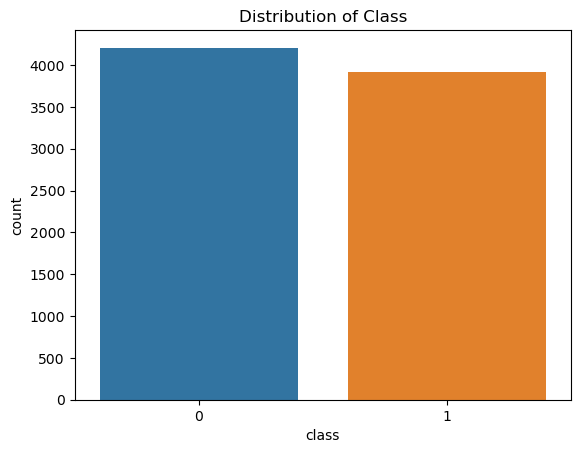

In [201]:
# Data visualization #
# Bar plot for the 'class' column
class_counts = df['class'].value_counts().reset_index()
class_counts.columns = ['class', 'count']
    
# Plot using sns.barplot
sns.barplot(x='class',y='count', data=class_counts)
plt.title('Distribution of Class')
plt.show()

This shows that the number of samples in each class is roughly equal, which is advantageous for training machine learning models. A balanced class distribution ensures that the model does not become biased towards any particular class, leading to more reliable and fair predictions.

In [202]:
# Sunburst Chart
dimensions = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'gill-size', 'gill-color']

fig = px.sunburst(df, path=dimensions)
fig.update_layout(title='Sunburst Chart')
fig.show()

The Sunburst chart shows the characteristics of mushrooms, highlighting important details about their types and features. It displays an even mix of edible and poisonous mushrooms and reveals clear patterns in their attributes. The chart also hints at which attribute combinations might indicate if a mushroom is safe to eat or toxic.

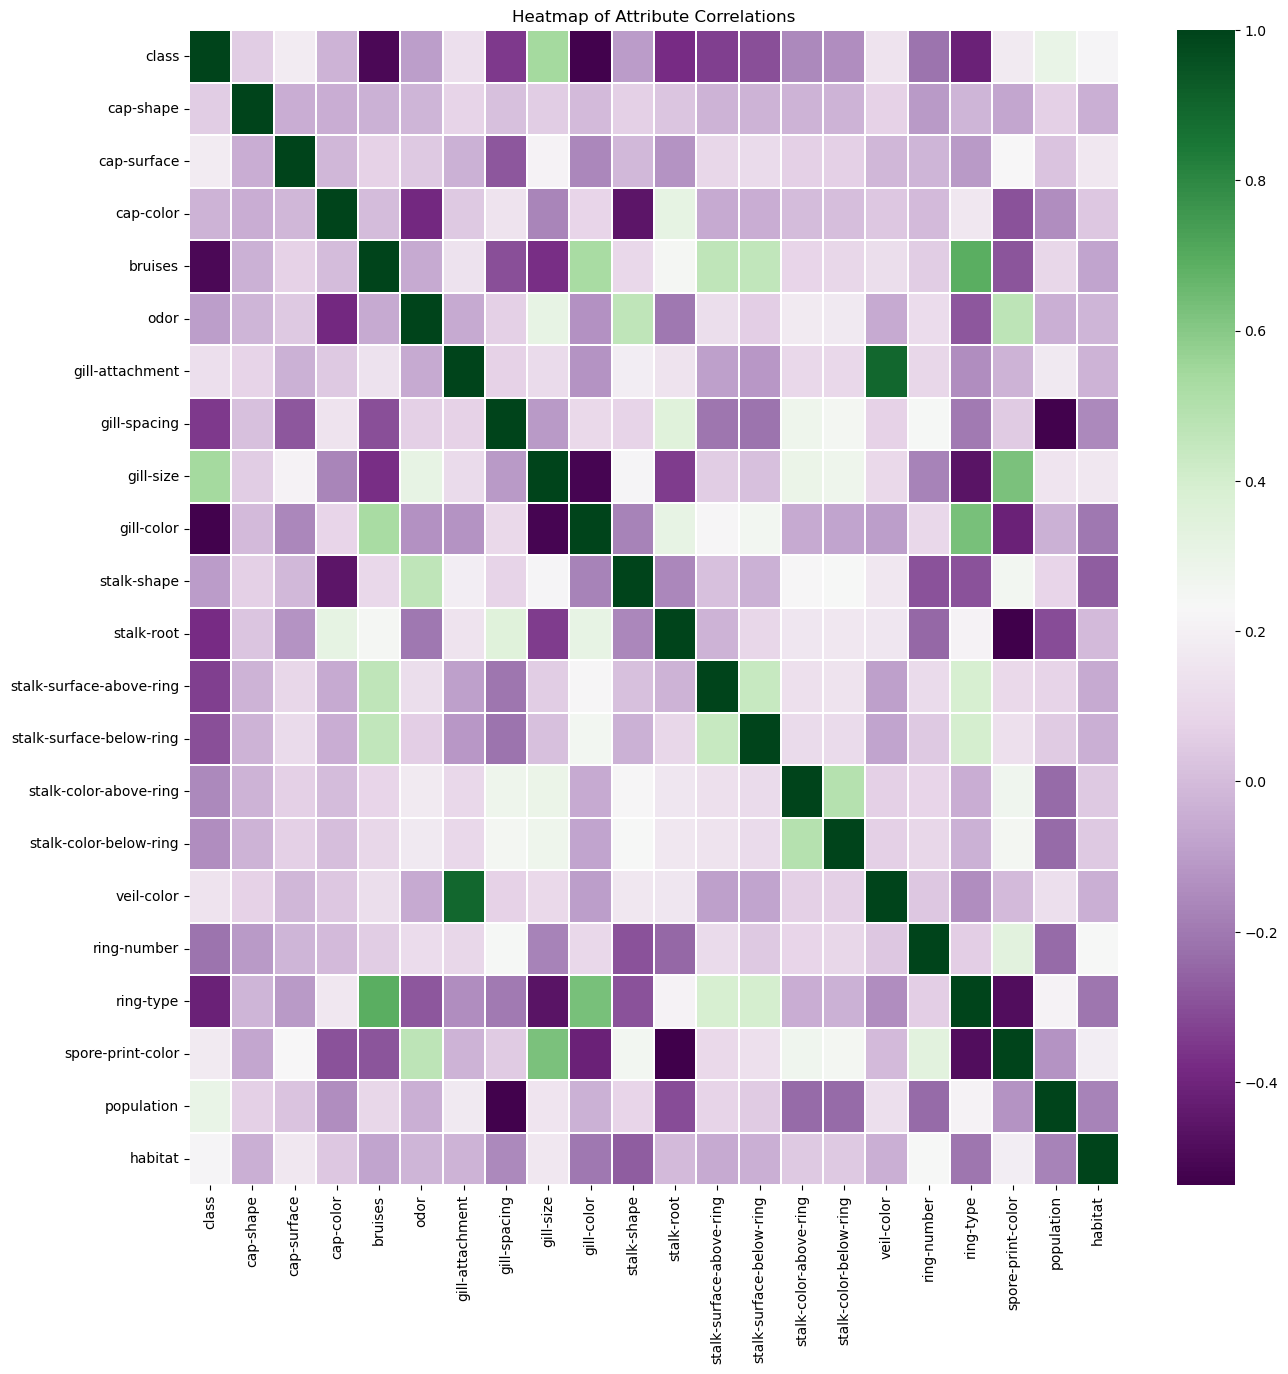

In [203]:
# Heatmap of correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='PRGn', linewidths=0.1)
plt.title('Heatmap of Attribute Correlations')
plt.show()

Since veil-color and gill attachment are highly correlated we can drop any one of them

In [204]:
df = df.drop('veil-color', axis = True)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

## Applying PCA - Dimensionality Reduction

In [206]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [207]:
# Columns for each group
cap_columns = ['cap-shape', 'cap-surface', 'cap-color']
gill_columns = ['gill-attachment', 'gill-spacing', 'gill-size', 'gill-color']
stalk_columns = ['stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring']

In [208]:
scaler = StandardScaler()

df[cap_columns] = scaler.fit_transform(df[cap_columns])
df[gill_columns] = scaler.fit_transform(df[gill_columns])
df[stalk_columns] = scaler.fit_transform(df[stalk_columns])

In [209]:
df = df.drop(columns=cap_columns + gill_columns + stalk_columns)

In [210]:
df.head()

,class,bruises,odor,ring-number,ring-type,spore-print-color,population,habitat
0,1,1,6,1,4,2,3,5
1,0,1,0,1,4,3,2,1
2,0,1,3,1,4,3,2,3
3,1,1,6,1,4,2,3,5
4,0,0,5,1,0,3,0,1


## Train - Test Split

In [211]:
X = df.drop('class', axis = True)
y = df['class']
     

In [212]:
X

,bruises,odor,ring-number,ring-type,spore-print-color,population,habitat
0,1,6,1,4,2,3,5
1,1,0,1,4,3,2,1
2,1,3,1,4,3,2,3
3,1,6,1,4,2,3,5
4,0,5,1,0,3,0,1
...,...,...,...,...,...,...,...
8119,0,5,1,4,0,1,2
8120,0,5,1,4,0,4,2
8121,0,5,1,4,0,1,2
8122,0,8,1,0,7,4,2


In [213]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [215]:
X_train.head()

,bruises,odor,ring-number,ring-type,spore-print-color,population,habitat
5921,1,2,1,4,1,4,5
1073,1,5,1,4,2,5,0
3710,0,2,1,2,1,4,0
144,1,0,1,4,2,2,1
5469,0,8,1,0,7,4,0


In [216]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [217]:
X_train.head()

,bruises,odor,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,1,4,1,4,5
1,1,5,1,4,2,5,0
2,0,2,1,2,1,4,0
3,1,0,1,4,2,2,1
4,0,8,1,0,7,4,0


In [218]:
y_train.head()

5921    1
1073    0
3710    1
144     0
5469    1
Name: class, dtype: int32

## Logistic Regression ##

In [219]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression()

In [220]:
logistic_regression_model.fit(X_train, y_train.values.reshape(-1))

LogisticRegression()

In [221]:
y_pred = logistic_regression_model.predict(X_test)
y_probs = logistic_regression_model.predict_proba(X_test)[:, 1]

In [222]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
     

accuracy = accuracy_score(y_test.values.reshape(-1), y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8232157506152584


In [223]:
# Generate classification report
class_report = classification_report(y_test.values.reshape(-1), y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1257
           1       0.80      0.84      0.82      1181

    accuracy                           0.82      2438
   macro avg       0.82      0.82      0.82      2438
weighted avg       0.82      0.82      0.82      2438



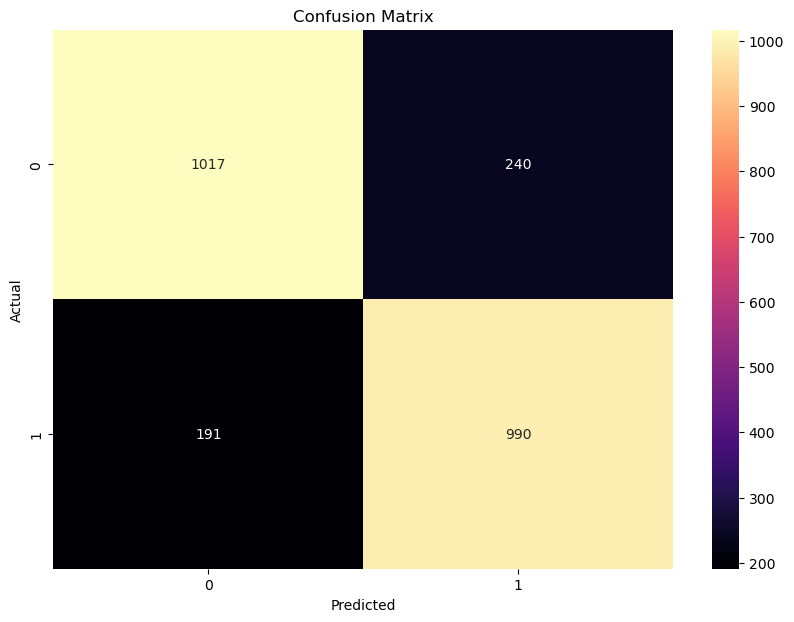

In [224]:
# Confusion Matrix Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

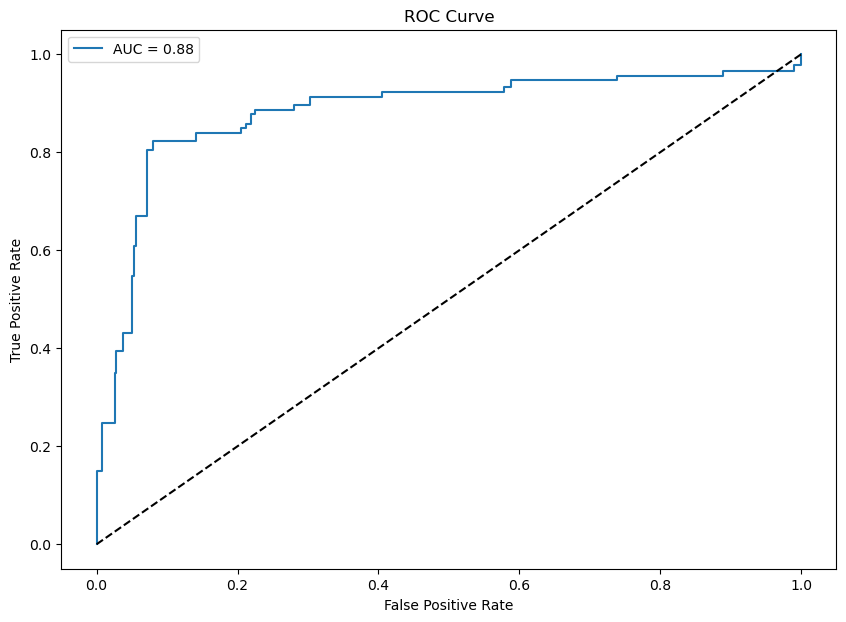

In [225]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test.values.reshape(-1), y_probs)
auc = roc_auc_score(y_test.values.reshape(-1), y_probs)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

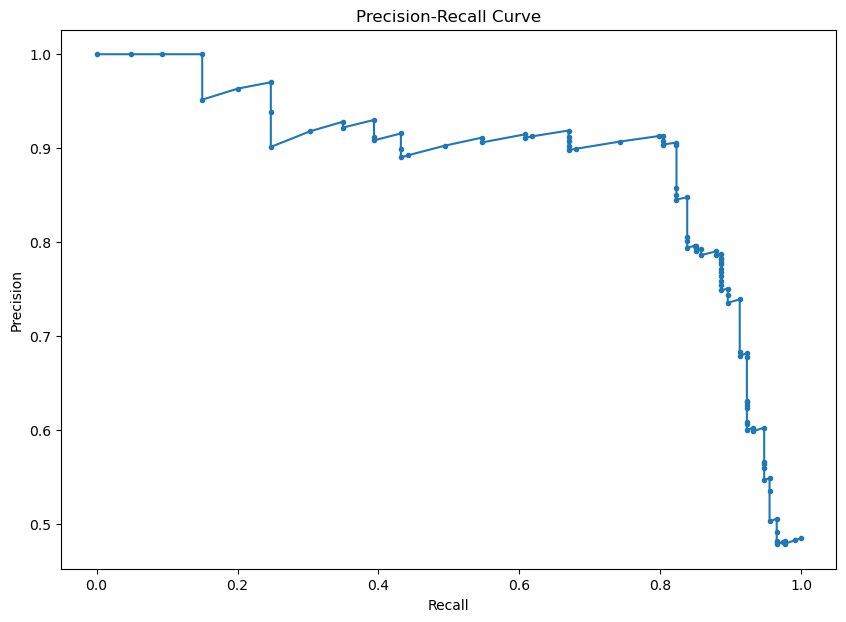

In [226]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test.values.reshape(-1), y_probs)
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [227]:
directory_path = '/content/drive/MyDrive/MushroomClassification/models/'
os.makedirs(directory_path, exist_ok=True)

# Define the full file path
file_path = os.path.join(directory_path, 'logistic_regression_model.pkl')

# Save the logistic regression model
joblib.dump(logistic_regression_model, file_path)

['/content/drive/MyDrive/MushroomClassification/models/logistic_regression_model.pkl']

## K Nearest Neighbour 

In [228]:
k = np.sqrt(len(X_train)).astype(int)
k

75

In [229]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=k)

In [230]:
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=75)

In [231]:
y_pred = knn_classifier.predict(X_test)
y_probs = knn_classifier.predict_proba(X_test)[:, 1]

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [232]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9782608695652174


In [233]:
# Generate classification report
class_report = classification_report(y_test.values.reshape(-1), y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1257
           1       0.96      0.99      0.98      1181

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



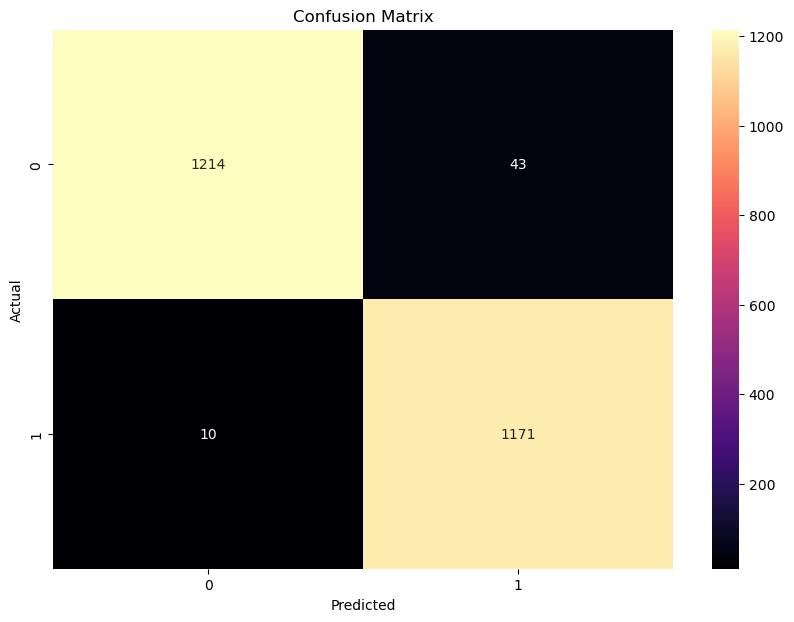

In [234]:
# Confusion Matrix Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

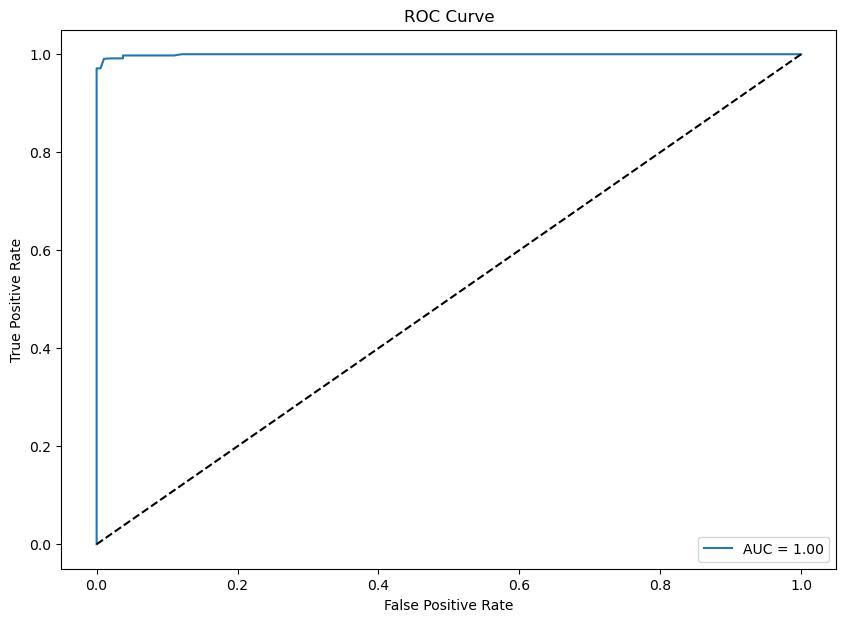

In [235]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test.values.reshape(-1), y_probs)
auc = roc_auc_score(y_test.values.reshape(-1), y_probs)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

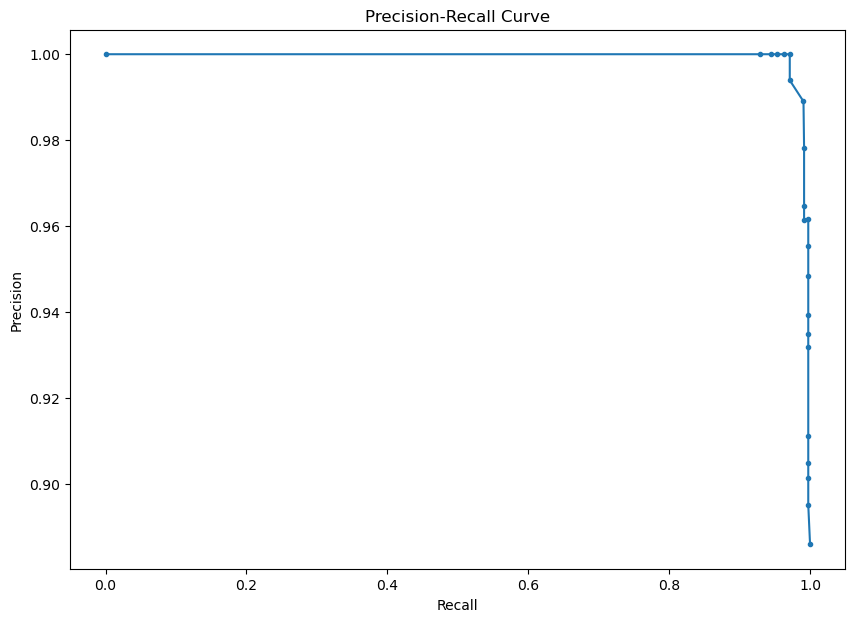

In [236]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test.values.reshape(-1), y_probs)
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## Naive Bayes

In [237]:
from sklearn.naive_bayes import GaussianNB
gnb_classifier = GaussianNB()

In [238]:
gnb_classifier.fit(X_train, y_train)

GaussianNB()

In [239]:
y_pred = gnb_classifier.predict(X_test)
y_probs = gnb_classifier.predict_proba(X_test)[:, 1]

In [240]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8244462674323215


In [241]:
# Generate classification report
class_report = classification_report(y_test.values.reshape(-1), y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1257
           1       0.82      0.82      0.82      1181

    accuracy                           0.82      2438
   macro avg       0.82      0.82      0.82      2438
weighted avg       0.82      0.82      0.82      2438



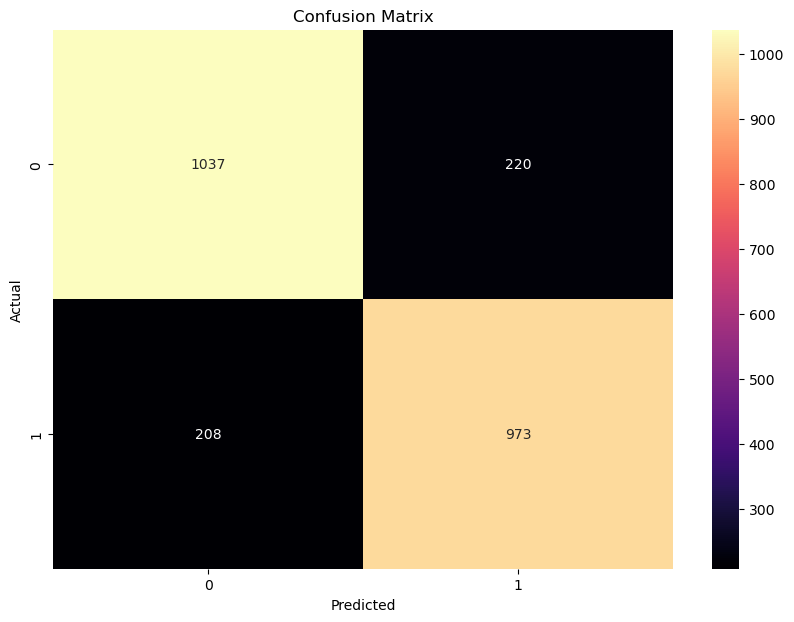

In [242]:
# Confusion Matrix Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

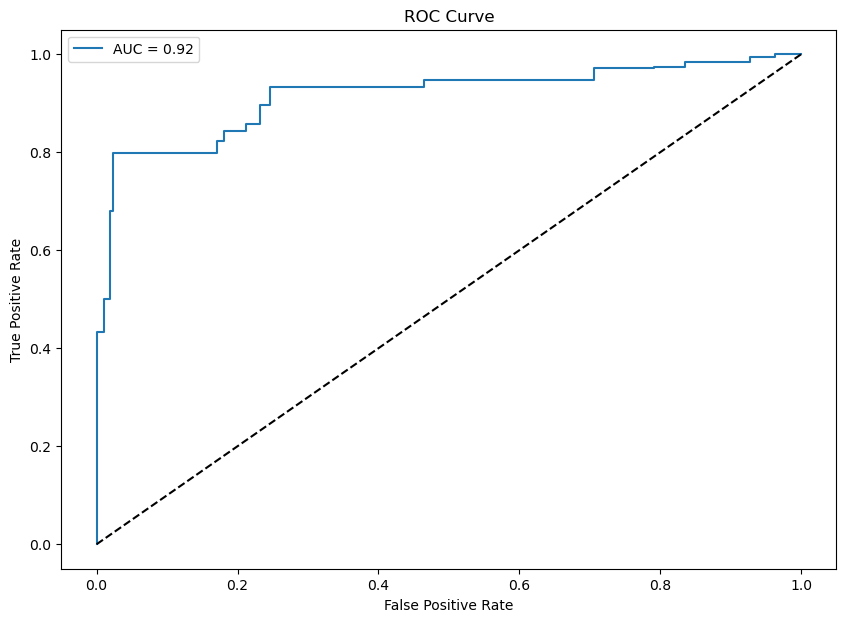

In [243]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test.values.reshape(-1), y_probs)
auc = roc_auc_score(y_test.values.reshape(-1), y_probs)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

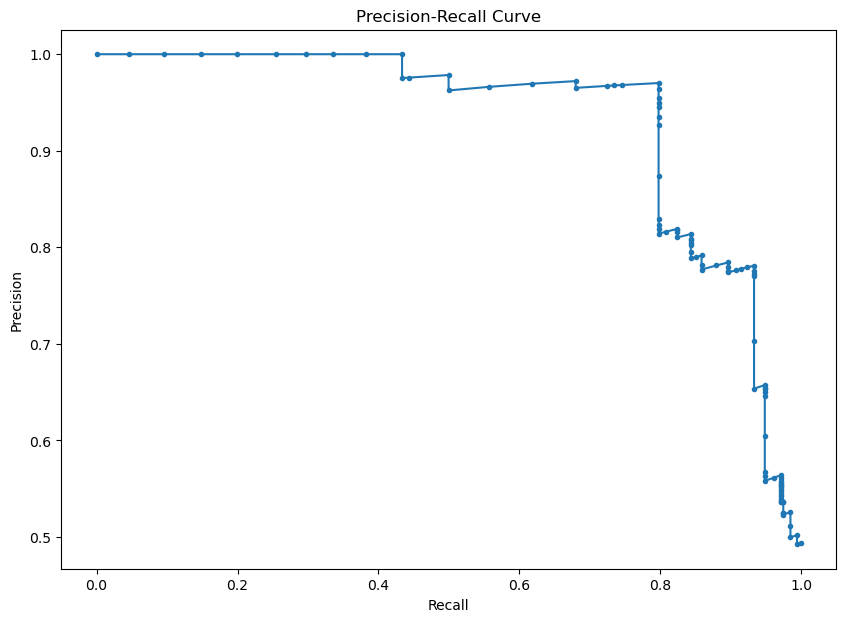

In [244]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test.values.reshape(-1), y_probs)
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## Support Vector Machine

In [245]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', probability=True)

In [246]:
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [247]:
y_pred = svm_model.predict(X_test)
y_probs = svm_model.predict_proba(X_test)[:, 1]

In [248]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9987694831829368


In [249]:
# Generate classification report
class_report = classification_report(y_test.values.reshape(-1), y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



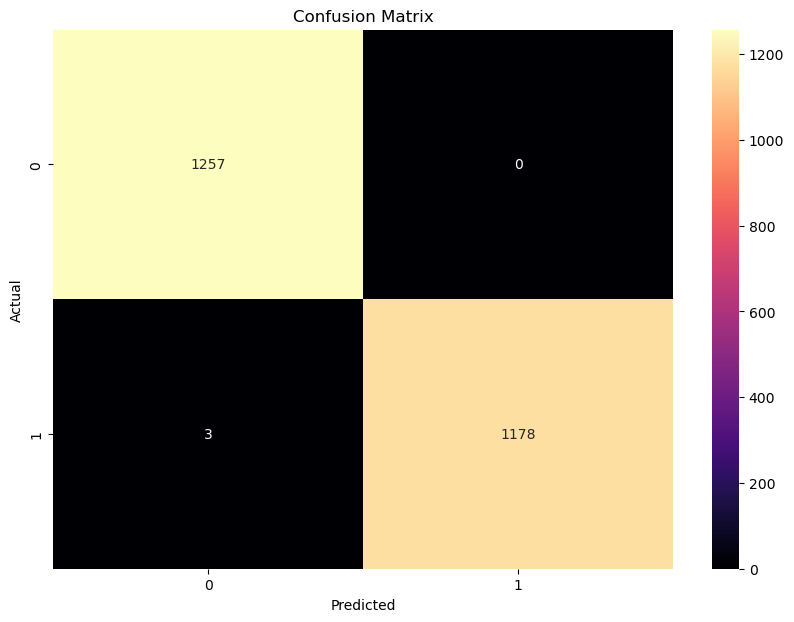

In [250]:
# Confusion Matrix Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

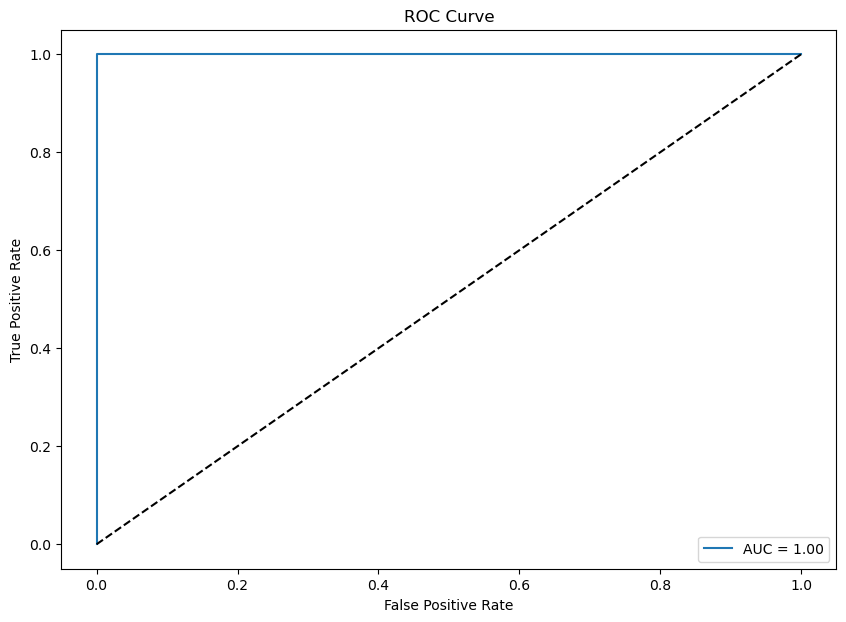

In [251]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test.values.reshape(-1), y_probs)
auc = roc_auc_score(y_test.values.reshape(-1), y_probs)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

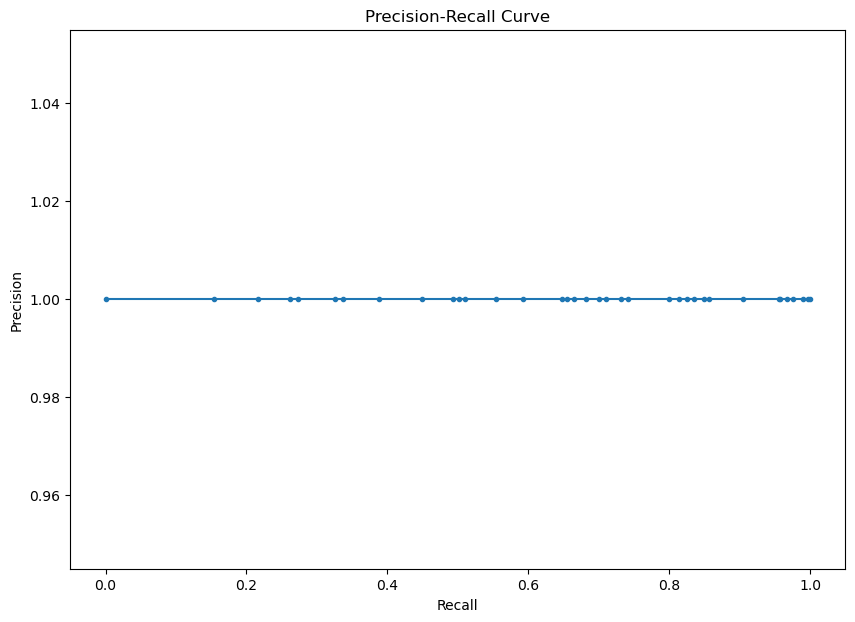

In [252]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test.values.reshape(-1), y_probs)
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## Decision Tree

In [253]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(max_depth=6, random_state=42)


In [254]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

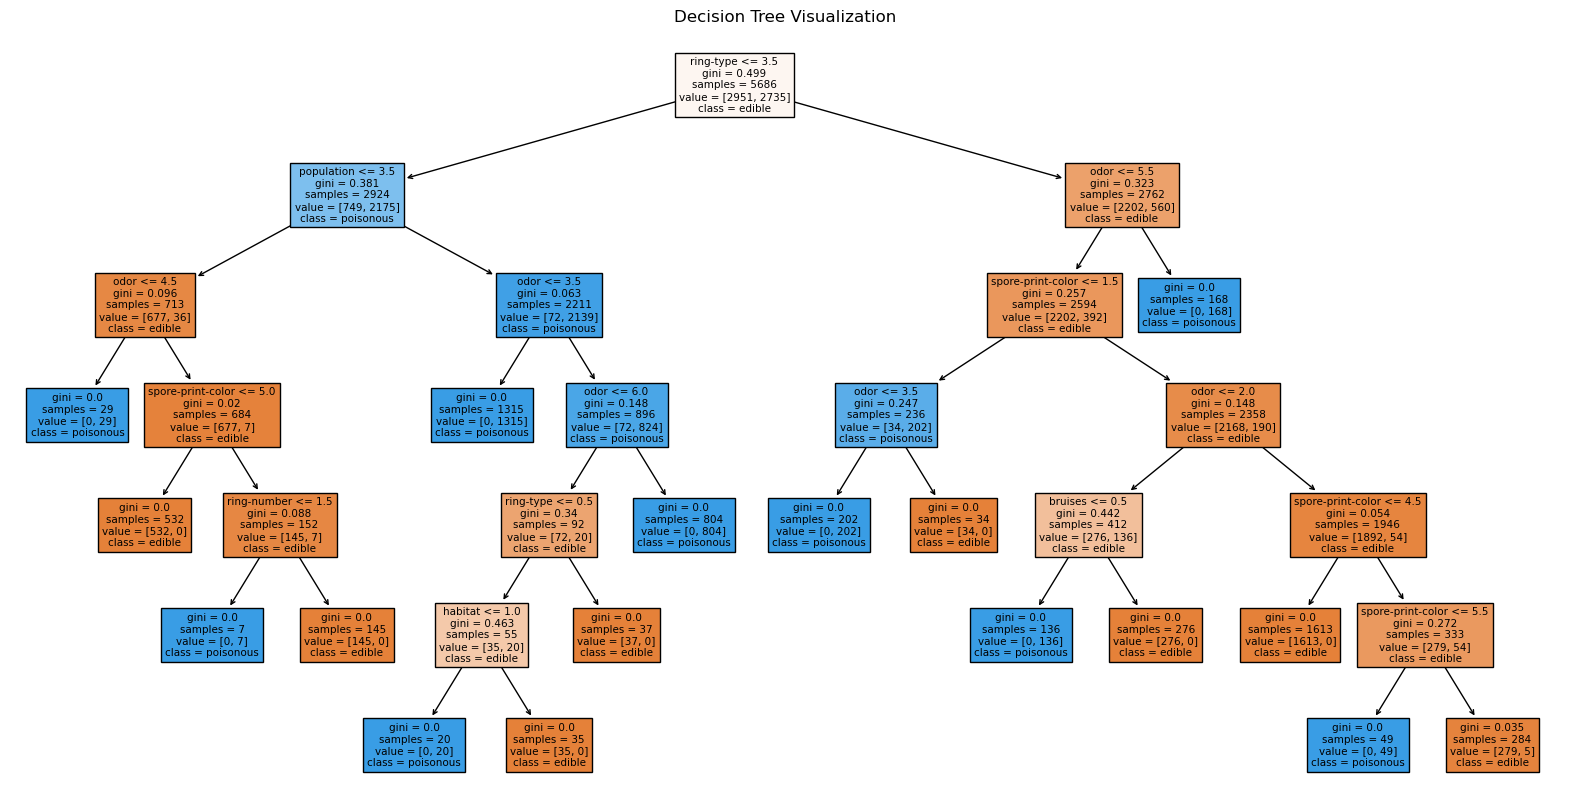

In [255]:
# Plot the decision tree
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(decision_tree_model, filled=True, feature_names=X_train.columns, class_names=['edible', 'poisonous'])
plt.title('Decision Tree Visualization')
plt.show()

In [256]:
y_pred = decision_tree_model.predict(X_test)
y_probs = decision_tree_model.predict_proba(X_test)[:, 1]

In [257]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [258]:
# Generate classification report
class_report = classification_report(y_test.values.reshape(-1), y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



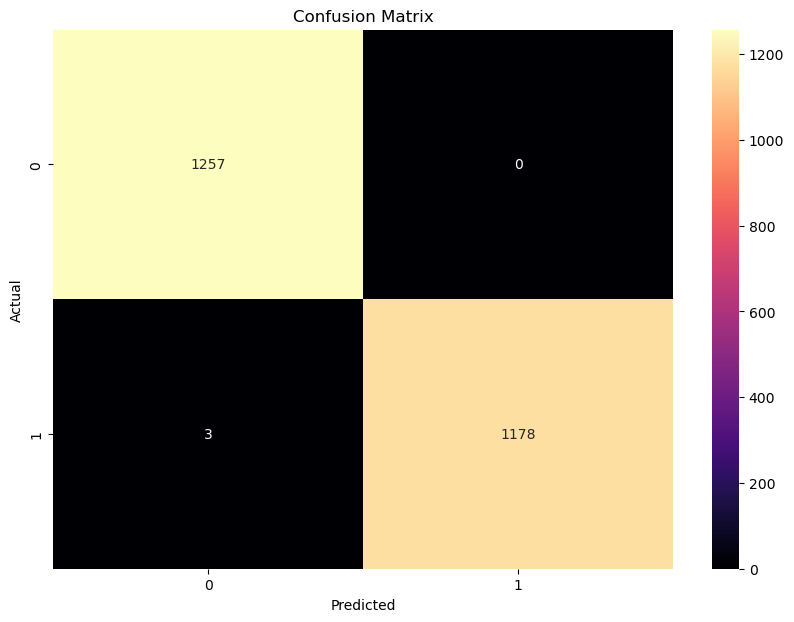

In [259]:
# Confusion Matrix Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

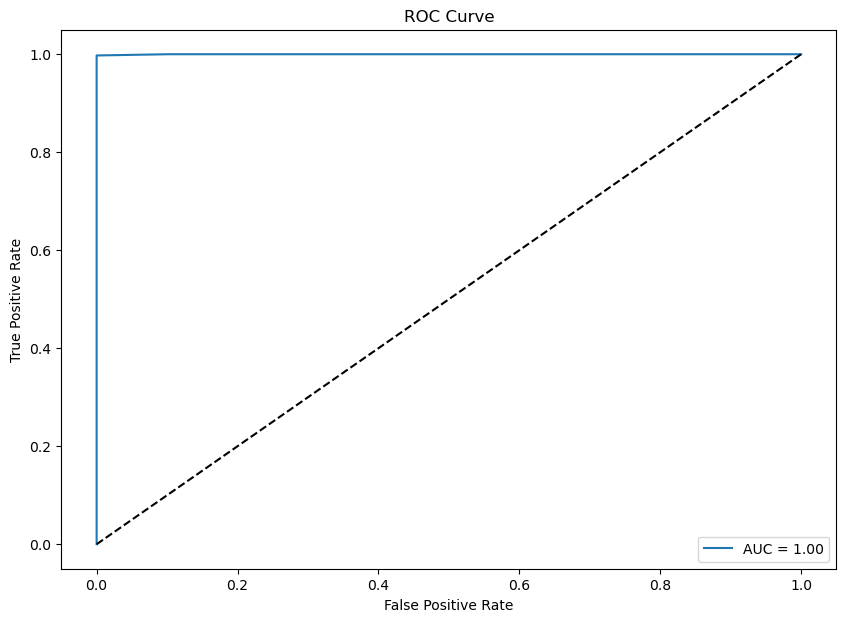

In [260]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test.values.reshape(-1), y_probs)
auc = roc_auc_score(y_test.values.reshape(-1), y_probs)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

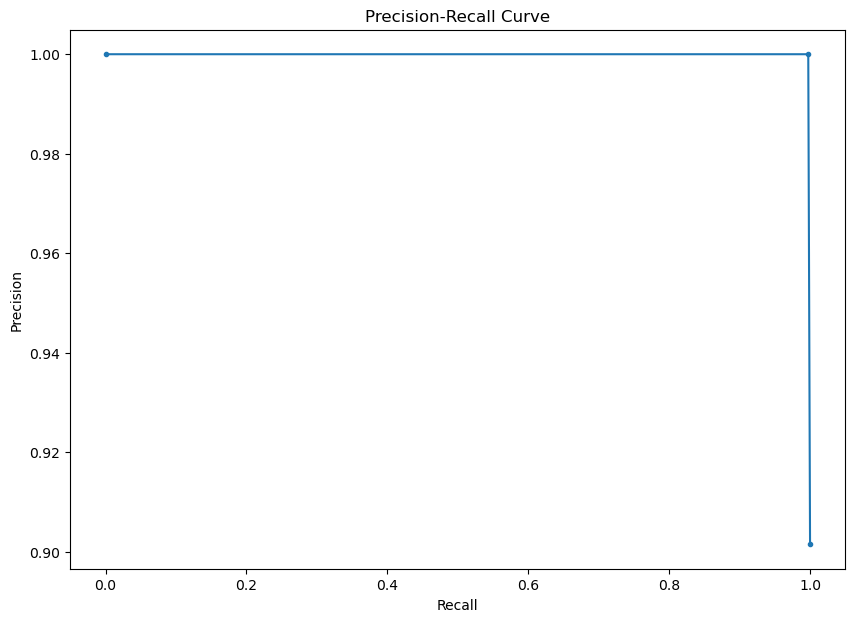

In [261]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test.values.reshape(-1), y_probs)
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## Artificial Neural Network

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 256)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,097 (266.00 KB)

 Trainable params: 68,097 (266.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - accuracy: 0.5125 - loss: 2.0574 - val_accuracy: 0.7000 - val_loss: 1.9835
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5437 - loss: 1.9905 - val_accuracy: 0.7000 - val_loss: 1.9449
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5430 - loss: 1.9481 - val_accuracy: 0.4000 - val_loss: 1.9135
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3953 - loss: 1.9153 - val_accuracy: 0.3500 - val_loss: 1.8681
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5211 - loss: 1.8539 - val_accuracy: 0.5000 - val_loss: 1.8158
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5484 - loss: 1.8055 - val_accuracy: 0.7500 - val_loss: 1.7631
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6000 - loss: 1.7552 - val_accuracy: 0.7500 - val_loss: 1.7094
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5953 - loss: 1.7027 - val_accuracy: 0.7500 - val_loss

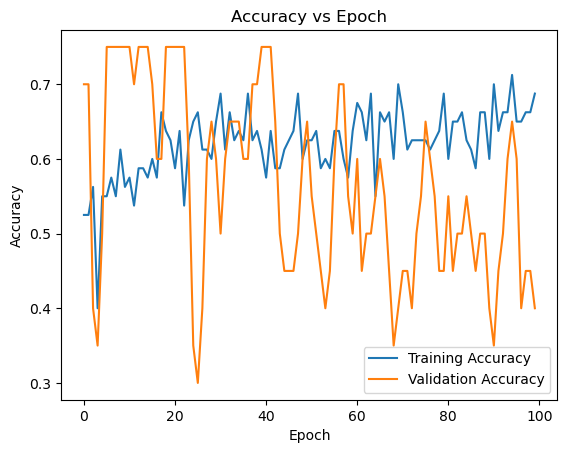

In [276]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1
import matplotlib.pyplot as plt

# Dummy data: 100 samples, 7 features
X_train = np.random.random((100, 7))
y_train = np.random.randint(2, size=(100, 1))  # Binary targets

# Define the model
ann_model = Sequential([
    Dense(256, input_dim=7, activation='relu', kernel_regularizer=l1(0.01)),  # input_dim should match number of features in X_train
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

ann_model.summary()

# Compile the model with accuracy metric
ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model and store the history
history = ann_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


Text(0, 0.5, 'Loss')

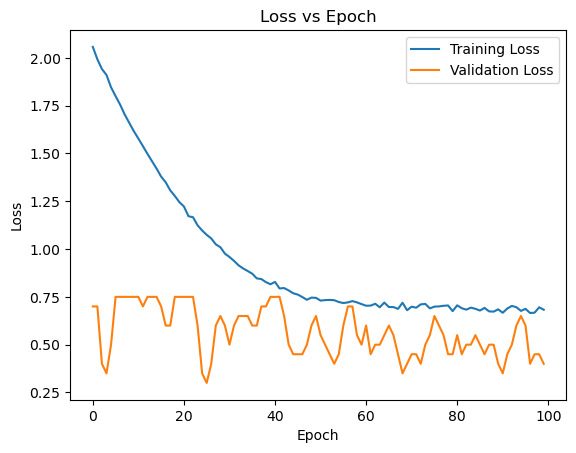

In [278]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_accuracy'], label = 'Validation Loss')
plt.legend()
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [280]:
y_pred = ann_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int) # Set threshold of 0.5
y_pred
     

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [281]:
# Generate classification report
class_report = classification_report(y_test.values.reshape(-1), y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.41      0.43      1257
           1       0.43      0.47      0.45      1181

    accuracy                           0.44      2438
   macro avg       0.44      0.44      0.44      2438
weighted avg       0.44      0.44      0.44      2438



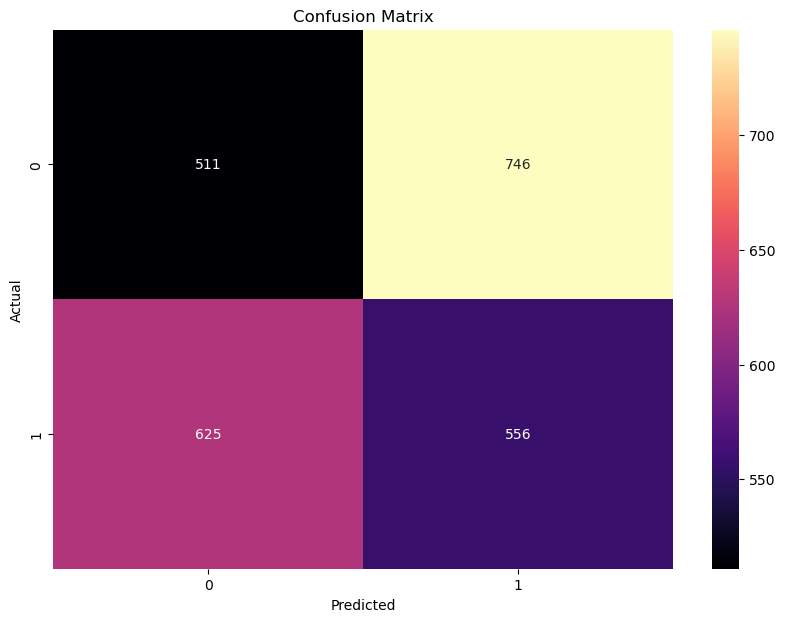

In [282]:
# Confusion Matrix Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [283]:
ann_model.save('/content/drive/MyDrive/MushroomClassification/models/ann_model.keras')

## Ensemble


In [285]:
estimators = [
    ('logistic_regression', logistic_regression_model),
    ('knn', knn_classifier),
    ('nb', gnb_classifier),
    ('svm', svm_model),
    ('decision_tree', decision_tree_model)
    # ('ann', ann_model)
]

In [288]:
stacking_model = StackingClassifier(estimators=estimators, final_estimator=svm_model)


In [289]:
stacking_model.fit(X_train, y_train)


C:\Users\ankit\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



StackingClassifier(estimators=[('logistic_regression', LogisticRegression()),
                               ('knn', KNeighborsClassifier(n_neighbors=75)),
                               ('nb', GaussianNB()),
                               ('svm', SVC(probability=True)),
                               ('decision_tree',
                                DecisionTreeClassifier(max_depth=6,
                                                       random_state=42))],
                   final_estimator=SVC(probability=True))

In [290]:
y_pred = stacking_model.predict(X_test)


C:\Users\ankit\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but GaussianNB was fitted without feature names

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but SVC was fitted without feature names

C:\Users\ankit\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



In [291]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Model Accuracy: {accuracy}")

Stacking Model Accuracy: 0.48441345365053323


In [292]:
joblib.dump(stacking_model, '/content/drive/MyDrive/MushroomClassification/models/stacking_model.pkl')


['/content/drive/MyDrive/MushroomClassification/models/stacking_model.pkl']

## Comparitive Analysis


In [295]:
model_names = ["Logistic Regression", "kNN", "Naive Bayes", "SVM", "Decision Tree", "ANN", "Ensemble Model"]
accuracies = [0.823, 0.978, 0.824, 0.998, 1, 0.440, 0.484]

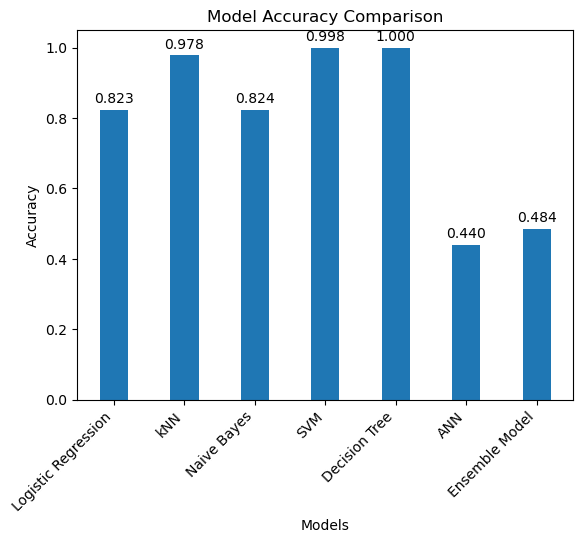

In [296]:
fig, ax = plt.subplots()
bars = ax.bar(model_names, accuracies, width=0.4)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.yticks()

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom')
plt.show()

## Ensemble Model for Mushroom Classification


The ensemble model combines the strengths of various classifiers to improve prediction accuracy and reliability for mushroom classification. It includes:

<b>*Logistic Regression</b>

<b>*K-Nearest Neighbors (KNN)</b>

<b>*Naive Bayes</b>

<b>*Support Vector Machine (SVM)</b>

<b>*Decision Tree</b>

<b>*Artificial Neural Network (ANN)</b> as the final estimator.

# Advantages:

<b>Improved Accuracy:</b> Combining multiple models often yields better results than using individual models.

<b>Robustness:</b> Reduces overfitting and handles dataset variations better.

<b>Generalization:</b> Performs well on new, unseen data due to model diversity

### Web Integration:

-Users input mushroom characteristics via a web interface.

-The ensemble model predicts if the mushroom is edible or poisonous, leveraging the combined strengths of all models for accurate classification.